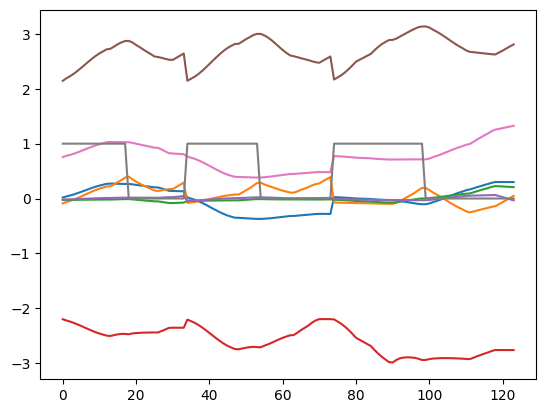

In [1]:
import h5py
import numpy as np


data_path = "/home/memmelma/Projects/robotic/gifs_curobo/pick_and_place_3.hdf5"

with h5py.File(data_path, "r", swmr=True) as f:
    
    actions = []
    ee_pos = []
    for dk in f["data"].keys():
        actions.append(f["data"][dk]["actions_raw"][:])
        ee_pos.append(f["data"][dk]["obs"]["ee_pos"][:])

import matplotlib.pyplot as plt

# plt.plot(np.concatenate(raw_actions[:3]))
plt.plot(np.concatenate(actions[:3]))
# plt.plot(np.concatenate(deno_actions[:5]))
plt.show()



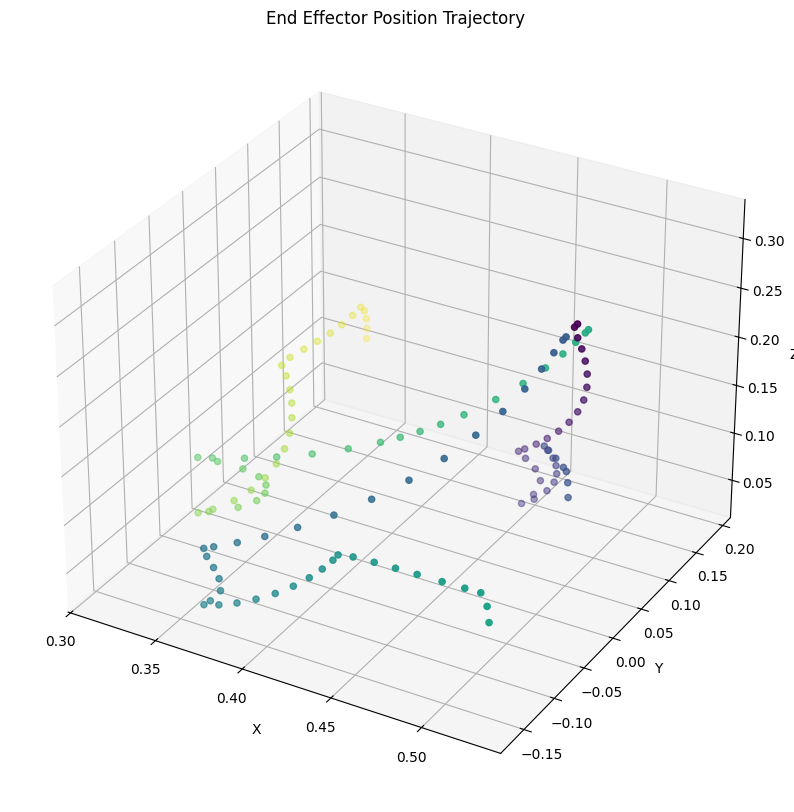

In [2]:
ee_pos_flat = np.concatenate(ee_pos[:250])

# Create 3D plot of end effector positions
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot end effector trajectory
ax.scatter(ee_pos_flat[:,0], ee_pos_flat[:,1], ee_pos_flat[:,2], c=range(len(ee_pos_flat)), cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
ax.set_title('End Effector Position Trajectory')

plt.show()


In [11]:
with h5py.File(data_path, "a", swmr=True) as f:
    for dk in f["data"].keys():
        try:
            del f["data"][dk]["obs"]["obj_poses_flat"]
        except:
            pass
        f["data"][dk]["obs"].create_dataset("obj_poses_flat", data=f["data"][dk]["obs"]["obj_poses"][:].squeeze())

/tmp/ipykernel_632671/1830579187.py:1: UserWarning: swmr=True only affects read ('r') mode. For swmr write mode, set f.swmr_mode = True after opening the file.
  with h5py.File(data_path, "a", swmr=True) as f:


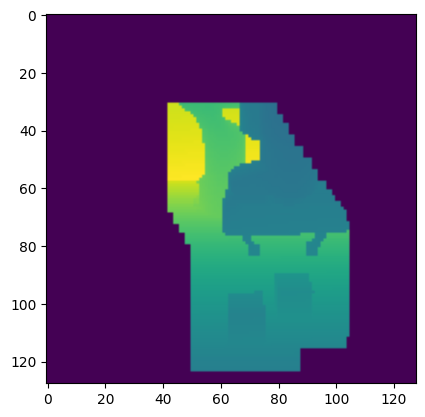

In [8]:
with h5py.File(data_path, "r", swmr=True) as f:
    for dk in f["data"].keys():
        mask_depth = f["data"][dk]["obs"]["mask_depth"][:]
        path_rgb = f["data"][dk]["obs"]["path_rgb"][:]
        break

import matplotlib.pyplot as plt
plt.imshow(path_rgb[10])
plt.imshow(mask_depth[10])
plt.show()

In [9]:
import fpsample
import numpy as np
import torch
pc = np.random.rand(65000, 3)
pc_torch = torch.from_numpy(pc)
pc_fps = fpsample.bucket_fps_kdline_sampling(pc_torch, 1024, h=3)
pc_fps









array([43313, 31868, 58990, ..., 16514, 60412, 40889], dtype=uint64)